In [4]:
"""
This file details preliminary feature exploration for the 
Expedia Recommendations dataset. 

29 November 2017
"""
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from datetime import timedelta

train = pd.read_csv('/Users/mattjohnson/Desktop/Expedia_Hotel_Recommendations/50k_train.csv')

We'll start by taking a look at the distributions of some of the features. 

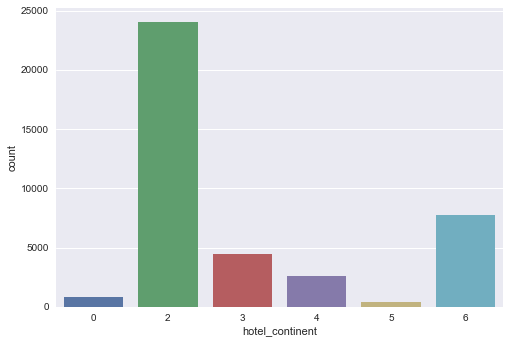

In [8]:
sns.countplot(x='hotel_continent', data=train)
plt.show()


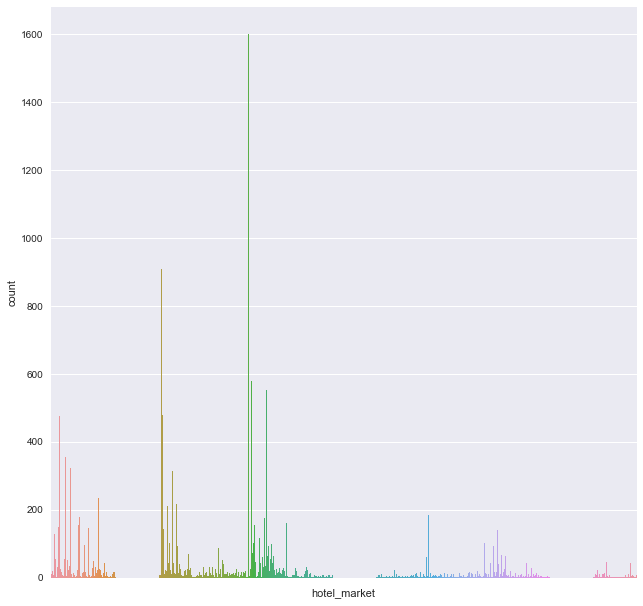

Cluster with most bookings: 99


In [20]:
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
hotel_markets_distr = sns.countplot(x='hotel_market', data=train)
plt.gca().axes.xaxis.set_ticklabels([])
fig = hotel_markets_distr.get_figure()
fig.savefig('hotel_markets_distr.jpeg')
plt.show()

print "Cluster with most bookings: " + str(max(train['hotel_cluster']))

It'd be interesting to look at the number of nights people were searching for. 

In [11]:
hotel_nights =[]
for i in range(len(train)):
    check_in = datetime.strptime(train.iloc[i]['srch_ci'], '%Y-%m-%d %H:%M:%S')
    check_out = datetime.strptime(train.iloc[i]['srch_co'], '%Y-%m-%d %H:%M:%S')
    nights = (check_out-check_in).days
    hotel_nights.append(nights)


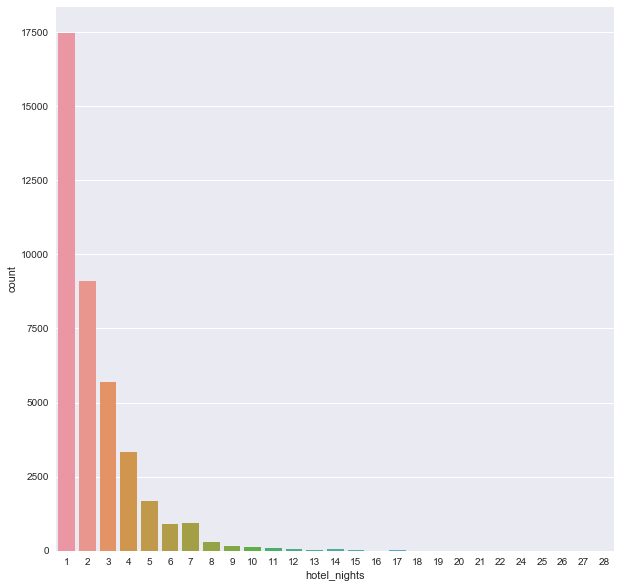

In [12]:
train['hotel_nights'] = hotel_nights

plt.figure(figsize=(10,10))
hotel_nights_distr = sns.countplot(x='hotel_nights', data=train)
fig = hotel_nights_distr.get_figure()
fig.savefig('hotel_nights_distr.jpeg')
plt.show()

Now let's take a look at the distribution of nights per booking vs some other metrics. 

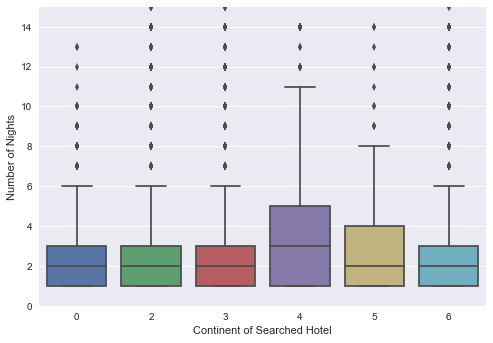

In [13]:
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
ax.set_xlabel('Continent of Searched Hotel')
ax.set_ylabel('Number of Nights')
lim = ax.set(ylim=(0, 15))
fig = ax.get_figure()
fig.savefig('continent_vs_hotel_nights.jpeg')
plt.show()

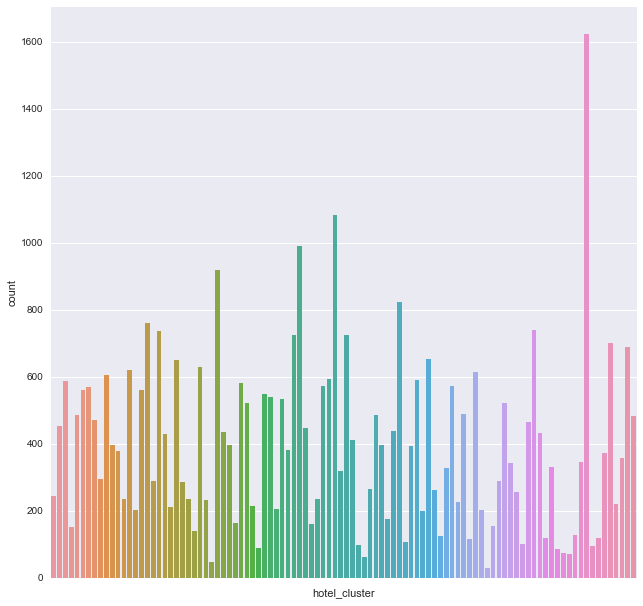

In [19]:
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
hotel_clusters_distr = sns.countplot(x='hotel_cluster', data=train)
plt.gca().axes.xaxis.set_ticklabels([])
fig = hotel_clusters_distr.get_figure()
fig.savefig('hotel_cluster_distr.jpeg')
plt.show()

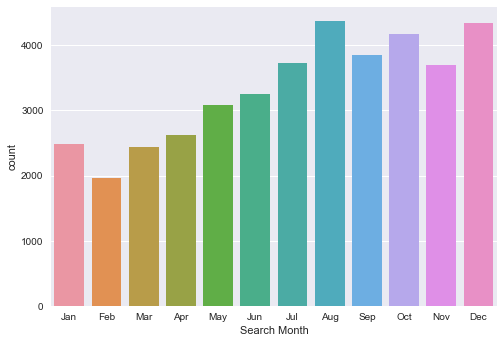

In [27]:
train['srch_yr'] = train['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
train['srch_month'] = train['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.countplot(x = 'srch_month', data = train)
plt.gca().axes.xaxis.set_ticklabels(months)
plt.gca().axes.set_xlabel("Search Month")
fig = ax.get_figure()
fig.savefig('bookings_by_month.jpeg')
plt.show()

Most people are looking for hotels in late summer or around the holiday season. 

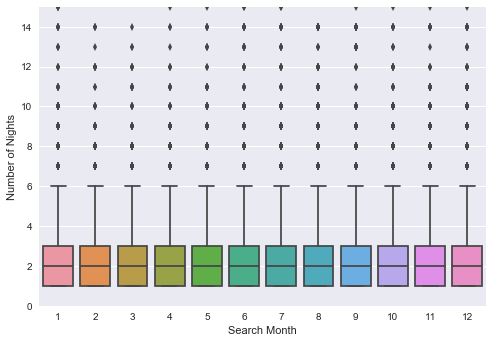

In [28]:
ax = sns.boxplot(x='srch_month', y='hotel_nights', data=train)
ax.set_xlabel('Search Month')
ax.set_ylabel('Number of Nights')
lim = ax.set(ylim=(0, 15))
fig = ax.get_figure()
fig.savefig('month_vs_hotel_nights.jpeg')
plt.show()